In [1]:
#importing libraries

import pandas as pd
import numpy as np

In [2]:
#import suicide csv

df=pd.read_csv("../data/suicide_rate.csv")

In [3]:
#import depression csv

df1=pd.read_csv('../data/prevalence-of-depression-by-age.csv')

In [4]:
#start cleaning. age needs to be changed for final merge

df['age'].value_counts()

df['age']=df['age'].str.replace(' ','').str.replace(r'\W','')


In [5]:
#confirm

df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,1524years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,3554years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,1524years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,2534years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
#change age

df['age']=(df['age'].str.replace("75years","35+ years")
                    .str.replace("2534years","25-34 years")
                    .str.replace("3554years","35+ years")
                    .str.replace("1524years","15-24 years")
                    .str.replace("5574years","35+ years")
                    .str.replace("514years","14- years"))

In [7]:
#group by

dfa=df.groupby(['country','year','age'], as_index=False).agg({'suicides/100k pop':'mean'})

In [8]:
#confirming groupby

dfa

,country,year,age,suicides/100k pop
0,Albania,1987,14- years,0.000000
1,Albania,1987,15-24 years,5.770000
2,Albania,1987,25-34 years,2.420000
3,Albania,1987,35+ years,2.578333
4,Albania,1988,14- years,0.000000
...,...,...,...,...
9263,Uzbekistan,2013,35+ years,6.133333
9264,Uzbekistan,2014,14- years,1.920000
9265,Uzbekistan,2014,15-24 years,11.345000
9266,Uzbekistan,2014,25-34 years,8.765000


In [9]:
#check if in columns

dfa.columns

Index(['country', 'year', 'age', 'suicides/100k pop'], dtype='object')

In [10]:
#cleaning second dataset

df1.head()

,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both - Age: 10 to 14 (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 15 to 19 (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 20 to 24 (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 25 to 29 (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 30 to 34 (Percent),Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 15-49 years (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 50-69 years (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 70+ years (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,1.594676,3.455708,4.417802,5.175856,5.799034,3.218871,4.939766,5.917752,5.202803,4.071831
1,Afghanistan,AFG,1991,1.588356,3.451880,4.433524,5.176729,5.814828,3.203468,4.902682,5.927093,5.192849,4.079531
2,Afghanistan,AFG,1992,1.577980,3.434982,4.453689,5.160249,5.829745,3.156559,4.837097,5.945656,5.176872,4.088358
3,Afghanistan,AFG,1993,1.577201,3.420210,4.464517,5.148767,5.853060,3.120655,4.813657,5.966915,5.167355,4.096190
4,Afghanistan,AFG,1994,1.570846,3.425222,4.462960,5.148227,5.852851,3.082179,4.839340,5.975907,5.157549,4.099582


In [11]:
#check columns to transpose

df1.columns

Index(['Entity', 'Code', 'Year',
       'Prevalence - Depressive disorders - Sex: Both - Age: 10 to 14 (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 15 to 19 (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 20 to 24 (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 25 to 29 (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 30 to 34 (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 15-49 years (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 50-69 years (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 70+ years (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)'],
      dtype='object')

In [12]:
#transpose with melt

df2=df1.melt(['Entity','Year'],value_vars=['Prevalence - Depressive disorders - Sex: Both - Age: 10 to 14 (Percent)','Prevalence - Depressive disorders - Sex: Both - Age: 15 to 19 (Percent)','Prevalence - Depressive disorders - Sex: Both - Age: 20 to 24 (Percent)','Prevalence - Depressive disorders - Sex: Both - Age: 25 to 29 (Percent)','Prevalence - Depressive disorders - Sex: Both - Age: 30 to 34 (Percent)','Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Percent)','Prevalence - Depressive disorders - Sex: Both - Age: 15-49 years (Percent)','Prevalence - Depressive disorders - Sex: Both - Age: 50-69 years (Percent)','Prevalence - Depressive disorders - Sex: Both - Age: 70+ years (Percent)'])

In [13]:
#confirm

df2.head()

,Entity,Year,variable,value
0,Afghanistan,1990,Prevalence - Depressive disorders - Sex: Both ...,1.594676
1,Afghanistan,1991,Prevalence - Depressive disorders - Sex: Both ...,1.588356
2,Afghanistan,1992,Prevalence - Depressive disorders - Sex: Both ...,1.577980
3,Afghanistan,1993,Prevalence - Depressive disorders - Sex: Both ...,1.577201
4,Afghanistan,1994,Prevalence - Depressive disorders - Sex: Both ...,1.570846


In [14]:
#confirm as columns

df2.columns

Index(['Entity', 'Year', 'variable', 'value'], dtype='object')

In [15]:
#eliminate spaces and characters

df2['variable']=df2['variable'].str.replace(' ','').str.replace(r'\W','')

In [16]:
#check names to replace according to the other table

df2['variable'].value_counts()

PrevalenceDepressivedisordersSexBothAge15to19Percent       6468
PrevalenceDepressivedisordersSexBothAge10to14Percent       6468
PrevalenceDepressivedisordersSexBothAge1549yearsPercent    6468
PrevalenceDepressivedisordersSexBothAgeAllAgesPercent      6468
PrevalenceDepressivedisordersSexBothAge20to24Percent       6468
PrevalenceDepressivedisordersSexBothAge5069yearsPercent    6468
PrevalenceDepressivedisordersSexBothAge30to34Percent       6468
PrevalenceDepressivedisordersSexBothAge25to29Percent       6468
PrevalenceDepressivedisordersSexBothAge70yearsPercent      6468
Name: variable, dtype: int64

In [17]:
#change age name to match first table

df2['variable']=(df2['variable'].str.replace("PrevalenceDepressivedisordersSexBothAge70yearsPercent","35+ years" )
                                .str.replace("PrevalenceDepressivedisordersSexBothAge15to19Percent","15-24 years")
                                .str.replace("PrevalenceDepressivedisordersSexBothAge25to29Percent","25-34 years")
                                .str.replace("PrevalenceDepressivedisordersSexBothAge20to24Percent","15-24 years")
                                .str.replace("PrevalenceDepressivedisordersSexBothAge5069yearsPercent","35+ years")
                                .str.replace("PrevalenceDepressivedisordersSexBothAge10to14Percent", "14- years")
                                .str.replace("PrevalenceDepressivedisordersSexBothAge30to34Percent", "25-34 years")
                                .str.replace("PrevalenceDepressivedisordersSexBothAge1549yearsPercent","35+ years")
                                .str.replace("PrevalenceDepressivedisordersSexBothAgeAllAgesPercent", "All ages"))

In [18]:
#confirm its successful

df2["variable"].value_counts()


35+ years      19404
15-24 years    12936
25-34 years    12936
14- years       6468
All ages        6468
Name: variable, dtype: int64

In [19]:
#groupby 

df2a=df2.groupby(['Entity','Year','variable'], as_index=False).agg({'value':'mean'})

df2a

,Entity,Year,variable,value
0,Afghanistan,1990,14- years,1.594676
1,Afghanistan,1990,15-24 years,3.936755
2,Afghanistan,1990,25-34 years,5.487445
3,Afghanistan,1990,35+ years,5.353440
4,Afghanistan,1990,All ages,3.218871
...,...,...,...,...
32335,Zimbabwe,2017,14- years,1.073118
32336,Zimbabwe,2017,15-24 years,2.651559
32337,Zimbabwe,2017,25-34 years,3.205170
32338,Zimbabwe,2017,35+ years,5.509123


In [20]:
#confirm it is as columns

df2a.columns

Index(['Entity', 'Year', 'variable', 'value'], dtype='object')

In [21]:
#merging

final_df = dfa.merge(df2a, left_on=['country','year','age'], right_on = ['Entity','Year','variable'])

In [22]:
#check if successful

final_df

,country,year,age,suicides/100k pop,Entity,Year,variable,value
0,Albania,1992,14- years,0.000000,Albania,1992,14- years,0.876335
1,Albania,1992,15-24 years,2.900000,Albania,1992,15-24 years,2.178477
2,Albania,1992,25-34 years,2.175000,Albania,1992,25-34 years,2.400357
3,Albania,1992,35+ years,1.308333,Albania,1992,35+ years,3.465856
4,Albania,1993,14- years,0.280000,Albania,1993,14- years,0.877473
...,...,...,...,...,...,...,...,...
7875,Uzbekistan,2013,35+ years,6.133333,Uzbekistan,2013,35+ years,4.695778
7876,Uzbekistan,2014,14- years,1.920000,Uzbekistan,2014,14- years,1.055283
7877,Uzbekistan,2014,15-24 years,11.345000,Uzbekistan,2014,15-24 years,2.888759
7878,Uzbekistan,2014,25-34 years,8.765000,Uzbekistan,2014,25-34 years,3.150176


In [23]:
#rename column about % depression

final_df=final_df.rename(columns={"value": "depression"})

In [24]:
#drop duplicated columns

dropcol=['Entity','Year','variable']

final_df=final_df.drop(dropcol, axis=1)

In [25]:
final_df

,country,year,age,suicides/100k pop,depression
0,Albania,1992,14- years,0.000000,0.876335
1,Albania,1992,15-24 years,2.900000,2.178477
2,Albania,1992,25-34 years,2.175000,2.400357
3,Albania,1992,35+ years,1.308333,3.465856
4,Albania,1993,14- years,0.280000,0.877473
...,...,...,...,...,...
7875,Uzbekistan,2013,35+ years,6.133333,4.695778
7876,Uzbekistan,2014,14- years,1.920000,1.055283
7877,Uzbekistan,2014,15-24 years,11.345000,2.888759
7878,Uzbekistan,2014,25-34 years,8.765000,3.150176


In [26]:
final_df.to_csv('depsuicide.csv')

In [27]:
final_df['year'].value_counts()

2009    340
2001    336
2010    336
2002    328
2007    328
2003    328
2000    324
2008    324
2011    324
2006    324
2004    320
2005    316
1999    312
2012    312
2013    308
1998    304
2014    300
1996    296
1995    296
1997    296
1994    260
1993    252
1992    248
1991    244
1990    240
2015    236
2016     48
Name: year, dtype: int64

In [28]:
#adding rural df

dfrural=pd.read_excel("../data/rural_excel.xls")

In [29]:
dfrural.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,Last Updated Date,2020-09-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.000,1961.000,1962.000,1963.000,1964.000,1965.000,...,2010.000,2011.000,2012.000,2013.000,2014.000,2015.000,2016.000,2017.000,2018.000,2019.000
3,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.941,57.060,57.043,57.010,56.959,56.892,56.808,56.707,56.589,56.454
4,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.599,91.316,91.024,90.724,90.414,90.096,...,76.263,76.052,75.840,75.627,75.413,75.197,74.980,74.750,74.505,74.246


In [30]:
dfrural.columns = dfrural.iloc[2]

In [31]:
dfrural.head()

2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
0,Last Updated Date,2020-09-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.000,1961.000,1962.000,1963.000,1964.000,1965.000,...,2010.000,2011.000,2012.000,2013.000,2014.000,2015.000,2016.000,2017.000,2018.000,2019.000
3,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.941,57.060,57.043,57.010,56.959,56.892,56.808,56.707,56.589,56.454
4,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.599,91.316,91.024,90.724,90.414,90.096,...,76.263,76.052,75.840,75.627,75.413,75.197,74.980,74.750,74.505,74.246


In [32]:
dfrural=dfrural.drop([0,1])

In [33]:
todrop=['Country Code','Indicator Name','Indicator Code']
        
dfrural=dfrural.drop(todrop, axis=1)

In [34]:
cols = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
dfrural.drop(dfrural.columns[cols],axis=1,inplace=True)

In [35]:
dfrural=dfrural.drop([2])

In [36]:
#dfrural.columns=dfrural.columns.str.replace(' ','')

#.str.replace(r'.0','')

In [37]:
#dfrural=dfrural.rename(columns={"1990.0": "1990"})

In [38]:
dfrural.head()

2,Country Name,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
3,Aruba,49.681,49.696,50.002,50.412,50.823,51.233,51.644,52.054,52.464,...,56.941,57.060,57.043,57.010,56.959,56.892,56.808,56.707,56.589,56.454
4,Afghanistan,78.823,78.734,78.645,78.556,78.466,78.376,78.286,78.195,78.105,...,76.263,76.052,75.840,75.627,75.413,75.197,74.980,74.750,74.505,74.246
5,Angola,62.856,61.420,59.961,58.489,57.000,55.831,54.654,53.475,52.290,...,40.217,39.472,38.732,37.998,37.269,36.554,35.851,35.161,34.486,33.823
6,Albania,63.572,63.300,62.751,62.201,61.646,61.089,60.527,59.965,59.399,...,47.837,46.753,45.670,44.613,43.577,42.566,41.579,40.617,39.681,38.771
7,Andorra,5.288,5.470,5.676,5.889,6.110,6.339,6.575,6.820,7.073,...,11.181,11.274,11.369,11.463,11.559,11.655,11.752,11.850,11.938,12.016


In [39]:
dfrural.columns=['Country name', '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']

In [40]:
dfrural.head()

,Country name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3,Aruba,49.681,49.696,50.002,50.412,50.823,51.233,51.644,52.054,52.464,...,56.941,57.060,57.043,57.010,56.959,56.892,56.808,56.707,56.589,56.454
4,Afghanistan,78.823,78.734,78.645,78.556,78.466,78.376,78.286,78.195,78.105,...,76.263,76.052,75.840,75.627,75.413,75.197,74.980,74.750,74.505,74.246
5,Angola,62.856,61.420,59.961,58.489,57.000,55.831,54.654,53.475,52.290,...,40.217,39.472,38.732,37.998,37.269,36.554,35.851,35.161,34.486,33.823
6,Albania,63.572,63.300,62.751,62.201,61.646,61.089,60.527,59.965,59.399,...,47.837,46.753,45.670,44.613,43.577,42.566,41.579,40.617,39.681,38.771
7,Andorra,5.288,5.470,5.676,5.889,6.110,6.339,6.575,6.820,7.073,...,11.181,11.274,11.369,11.463,11.559,11.655,11.752,11.850,11.938,12.016


In [41]:
dfrural2=dfrural.melt(['Country name'],var_name="Year",value_name="Rural area")

In [42]:
dfrural2

,Country name,Year,Rural area
0,Aruba,1990,49.681
1,Afghanistan,1990,78.823
2,Angola,1990,62.856
3,Albania,1990,63.572
4,Andorra,1990,5.288
...,...,...,...
7915,Kosovo,2019,NaN
7916,"Yemen, Rep.",2019,62.727
7917,South Africa,2019,33.144
7918,Zambia,2019,55.928


In [43]:
#finalruraldf=final_df.concat(dfrural2, left_on=['country','year'], right_on=['Country name','Year'])

#final_df = dfa.merge(df2a, left_on=['country','year','age'], right_on = ['Entity','Year','variable'])

#finalruraldf=pd.concat

In [44]:
#dfr1 = pd.final_df(columns=['country', 'year','suicides/100k pop', 'depression'])
#dfr2=pd.dfrural2(columns=['Rural area'])

#pd.concat([dfr1, dfr2])

In [45]:
#pd.concat([dfrural2, final_df], join='inner',axis=1)

In [46]:
dfrural2.head()

,Country name,Year,Rural area
0,Aruba,1990,49.681
1,Afghanistan,1990,78.823
2,Angola,1990,62.856
3,Albania,1990,63.572
4,Andorra,1990,5.288


In [47]:
final_df.head()

,country,year,age,suicides/100k pop,depression
0,Albania,1992,14- years,0.000000,0.876335
1,Albania,1992,15-24 years,2.900000,2.178477
2,Albania,1992,25-34 years,2.175000,2.400357
3,Albania,1992,35+ years,1.308333,3.465856
4,Albania,1993,14- years,0.280000,0.877473


In [48]:
dfdep=final_df.copy()
dfdep2=dfrural2.copy()

In [49]:
dfdep=dfdep.groupby(['country','year'], as_index=False).agg({'suicides/100k pop':'mean','depression':'mean'})

#df2a=df2.groupby(['Entity','Year','variable'], as_index=False).agg({'value':'mean'})

dfdep

,country,year,suicides/100k pop,depression
0,Albania,1992,1.595833,2.230256
1,Albania,1993,2.860833,2.236942
2,Albania,1994,2.090000,2.245163
3,Albania,1995,3.317917,2.252920
4,Albania,1996,3.736667,2.261308
...,...,...,...,...
1969,Uzbekistan,2010,5.221250,2.954389
1970,Uzbekistan,2011,5.767500,2.953330
1971,Uzbekistan,2012,6.632917,2.951567
1972,Uzbekistan,2013,6.790833,2.949253


In [50]:
dfdep2.dtypes
dfdep2['Year']=pd.to_numeric(dfdep2['Year'],downcast='integer')
dfdep2['Rural area']=pd.to_numeric(dfdep2['Rural area'],downcast='integer')

In [51]:
dfdep2.dtypes

Country name     object
Year              int16
Rural area      float64
dtype: object

In [52]:
dfdep.dtypes

country               object
year                   int64
suicides/100k pop    float64
depression           float64
dtype: object

In [53]:
dftrial = dfdep.merge(dfdep2, left_on=['country','year'], right_on = ['Country name','Year'])

In [54]:
dftrial=dftrial.drop(['Country name','Year'], axis=1)

In [55]:
dftrial

,country,year,suicides/100k pop,depression,Rural area
0,Albania,1992,1.595833,2.230256,62.751
1,Albania,1993,2.860833,2.236942,62.201
2,Albania,1994,2.090000,2.245163,61.646
3,Albania,1995,3.317917,2.252920,61.089
4,Albania,1996,3.736667,2.261308,60.527
...,...,...,...,...,...
1876,Uzbekistan,2010,5.221250,2.954389,49.044
1877,Uzbekistan,2011,5.767500,2.953330,48.850
1878,Uzbekistan,2012,6.632917,2.951567,48.950
1879,Uzbekistan,2013,6.790833,2.949253,49.050


In [56]:
dfcountry=dftrial.groupby('country', as_index=False).agg({'suicides/100k pop':'mean','depression':'mean','Rural area':'mean'})

In [57]:
#to csv

dftrial.to_csv('rural_depression.csv')

In [58]:
dfcountry

,country,suicides/100k pop,depression,Rural area
0,Albania,3.415417,2.278600,56.412105
1,Antigua and Barbuda,0.396098,2.612769,69.514045
2,Argentina,8.141811,3.916675,10.507500
3,Armenia,2.257561,2.732754,35.338120
4,Australia,11.380733,5.126570,15.077600
...,...,...,...,...
83,United Arab Emirates,1.240903,2.947744,16.808500
84,United Kingdom,6.229567,4.223303,20.272692
85,United States,11.021138,5.047128,20.917346
86,Uruguay,15.390525,3.596152,7.368478


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

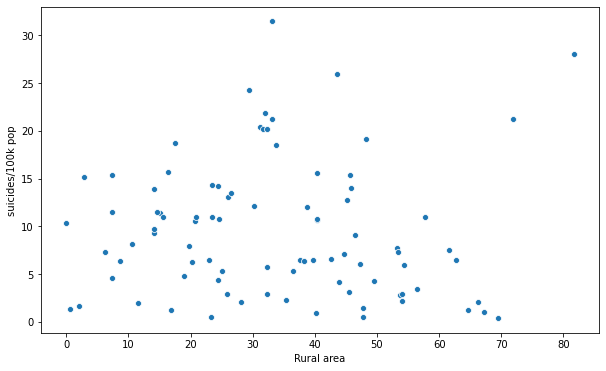

In [60]:

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=dfcountry,
                x="Rural area",
                y="suicides/100k pop",
                ax=ax);

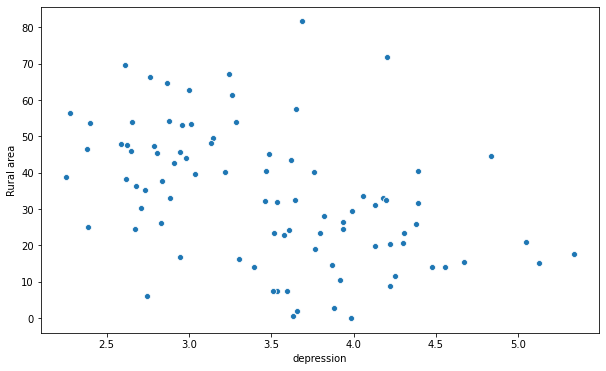

In [61]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=dfcountry,
                x="depression",
                y="Rural area",
                ax=ax);

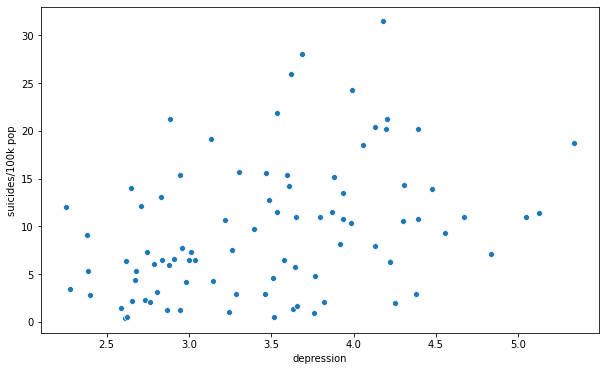

In [62]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=dfcountry,
                x="depression",
                y="suicides/100k pop",
                ax=ax);

In [63]:
##Analysis

In [64]:
dftrial.head()

,country,year,suicides/100k pop,depression,Rural area
0,Albania,1992,1.595833,2.230256,62.751
1,Albania,1993,2.860833,2.236942,62.201
2,Albania,1994,2.090000,2.245163,61.646
3,Albania,1995,3.317917,2.252920,61.089
4,Albania,1996,3.736667,2.261308,60.527


In [65]:
dfcountry.head()

,country,suicides/100k pop,depression,Rural area
0,Albania,3.415417,2.278600,56.412105
1,Antigua and Barbuda,0.396098,2.612769,69.514045
2,Argentina,8.141811,3.916675,10.507500
3,Armenia,2.257561,2.732754,35.338120
4,Australia,11.380733,5.126570,15.077600


In [66]:
#be sure there are no null values

nulltrial=dftrial.isnull().sum()
nulltrial.sort_values(ascending=False)

Rural area           0
depression           0
suicides/100k pop    0
year                 0
country              0
dtype: int64

In [67]:
#suicides corr

dftrial.corr()['suicides/100k pop']

year                -0.124540
suicides/100k pop    1.000000
depression           0.331911
Rural area          -0.052315
Name: suicides/100k pop, dtype: float64

In [68]:
#depression

dftrial.corr()['depression']

year                -0.064743
suicides/100k pop    0.331911
depression           1.000000
Rural area          -0.431282
Name: depression, dtype: float64

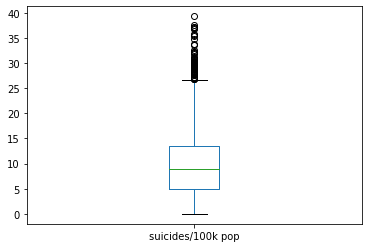

In [69]:
#check for outliers

dftrial.boxplot(column='suicides/100k pop', grid=False)

In [70]:
descriptive=dftrial.describe().transpose() 
descriptive

,count,mean,std,min,25%,50%,75%,max
year,1881.0,2003.039872,7.290624,1990.000000,1997.000000,2003.000000,2009.000000,2016.000000
suicides/100k pop,1881.0,9.997649,7.118492,0.000000,4.877083,8.942083,13.557083,39.310833
depression,1881.0,3.531012,0.727922,2.215816,2.885978,3.533458,4.078942,5.669116
Rural area,1881.0,32.093443,18.073507,0.000000,18.054000,31.649000,45.598000,81.712000


In [71]:
descriptive['IQR'] = descriptive['75%'] - descriptive['25%']
print(descriptive['IQR'])

outlier25=descriptive['25%']-(1.5*descriptive['IQR'])

outlier75=descriptive['75%']+(1.5*descriptive['IQR'])

print('outlier25', outlier25)
print('outlier75', outlier75)

year                 12.000000
suicides/100k pop     8.680000
depression            1.192964
Rural area           27.544000
Name: IQR, dtype: float64
outlier25 year                 1979.000000
suicides/100k pop      -8.142917
depression              1.096532
Rural area            -23.262000
dtype: float64
outlier75 year                 2027.000000
suicides/100k pop      26.577083
depression              5.868388
Rural area             86.914000
dtype: float64


In [72]:
#with years, probably dummy needed

dftrialstats=dftrial.copy()

dftrialstats= sm.add_constant(dftrialstats)
y = dftrialstats["suicides/100k pop"]
X = dftrialstats[["const","depression"]]
reg = sm.OLS(y, X).fit()

reg.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      suicides/100k pop   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     232.6
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           1.31e-49
Time:                        17:34:34   Log-Likelihood:                -6250.6
No. Observations:                1881   AIC:                         1.251e+04
Df Residuals:                    1879   BIC:                         1.252e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4634      0.767     -1.907      0.057      -2.968       0.041
depression     3.2458      0.213     15.252      0.000       2.828       3.663
==============================================================================
Omnibus:                      285.392   Durbin-Watson:                   0.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              443.174
Skew:                           1.046   Prob(JB):                     5.83e-97
Kurtosis:                       4.132   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
#average of the years

dfcountrystats=dfcountry.copy()

dfcountrystats= sm.add_constant(dfcountrystats)
y2 = dfcountrystats["suicides/100k pop"]
X2 = dfcountrystats[["const","depression"]]
reg2 = sm.OLS(y2, X2).fit()

reg2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      suicides/100k pop   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     13.41
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           0.000432
Time:                        17:34:34   Log-Likelihood:                -288.99
No. Observations:                  88   AIC:                             582.0
Df Residuals:                      86   BIC:                             586.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9865      3.498     -0.854      0.396      -9.940       3.967
depression     3.6020      0.984      3.662      0.000       1.646       5.558
==============================================================================
Omnibus:                       10.796   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.110
Skew:                           0.848   Prob(JB):                      0.00387
Kurtosis:                       3.390   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
#rural area check

dfrarea=dftrial.copy()

dfrarea= sm.add_constant(dfrarea)
y3 = dfrarea["depression"]
X3 = dfrarea[["const","Rural area"]]
reg3 = sm.OLS(y3, X3).fit()

reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             depression   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     429.4
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           4.56e-86
Time:                        17:34:35   Log-Likelihood:                -1877.6
No. Observations:                1881   AIC:                             3759.
Df Residuals:                    1879   BIC:                             3770.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0885      0.031    132.424      0.000       4.028       4.149
Rural area    -0.0174      0.001    -20.721      0.000      -0.019      -0.016
==============================================================================
Omnibus:                       40.661   Durbin-Watson:                   0.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.133
Skew:                           0.353   Prob(JB):                     7.09e-10
Kurtosis:                       2.803   Cond. No.                         75.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
#rural area complete

In [76]:
dftrial.head()

,country,year,suicides/100k pop,depression,Rural area
0,Albania,1992,1.595833,2.230256,62.751
1,Albania,1993,2.860833,2.236942,62.201
2,Albania,1994,2.090000,2.245163,61.646
3,Albania,1995,3.317917,2.252920,61.089
4,Albania,1996,3.736667,2.261308,60.527


In [77]:
statsyearrural=dftrial.copy()

dummyyearrural=pd.get_dummies(statsyearrural['year'])
statsyearrural = statsyearrural.drop('year',axis = 1)
statsyearrural = statsyearrural.join(dummyyearrural)
statsyearrural.columns=['country','suicides/100k pop','depression','Rural area','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']

In [78]:
statsyearrural = sm.add_constant(statsyearrural)
yyr = statsyearrural["depression"]
Xyr = statsyearrural[["const","Rural area",'1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']]

regyr = sm.OLS(yyr, Xyr).fit()

regyr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             depression   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     17.55
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           4.44e-73
Time:                        17:34:35   Log-Likelihood:                -1857.0
No. Observations:                1881   AIC:                             3770.
Df Residuals:                    1853   BIC:                             3925.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9715      0.030    131.468      0.000       3.912       4.031
Rural area    -0.0178      0.001    -21.240      0.000      -0.019      -0.016
1990           0.2180      0.084      2.588      0.010       0.053       0.383
1991           0.2253      0.084      2.696      0.007       0.061       0.389
1992           0.2368      0.084      2.834      0.005       0.073       0.401
1993           0.2149      0.084      2.573      0.010       0.051       0.379
1994           0.2026      0.082      2.465      0.014       0.041       0.364
1995           0.2314      0.077      3.008      0.003       0.081       0.382
1996           0.2527      0.077      3.285      0.001       0.102       0.404
1997           0.2648      0.077      3.443      0.001       0.114       0.416
1998           0.2406      0.076      3.170      0.002       0.092       0.389
1999           0.2109      0.075      2.816      0.005       0.064       0.358
2000           0.1678      0.073      2.283      0.023       0.024       0.312
2001           0.1623      0.072      2.249      0.025       0.021       0.304
2002           0.1602      0.073      2.193      0.028       0.017       0.304
2003           0.1477      0.073      2.022      0.043       0.004       0.291
2004           0.1022      0.074      1.382      0.167      -0.043       0.247
2005           0.0687      0.074      0.923      0.356      -0.077       0.215
2006           0.0680      0.073      0.926      0.355      -0.076       0.212
2007           0.0698      0.073      0.962      0.336      -0.073       0.212
2008           0.0650      0.073      0.885      0.376      -0.079       0.209
2009           0.0349      0.072      0.486      0.627      -0.106       0.176
2010           0.0328      0.072      0.454      0.650      -0.109       0.174
2011           0.0418      0.073      0.573      0.567      -0.101       0.185
2012           0.0416      0.075      0.555      0.579      -0.105       0.188
2013           0.0327      0.075      0.434      0.664      -0.115       0.181
2014          -0.0170      0.076     -0.224      0.823      -0.166       0.132
2015          -0.0444      0.084     -0.527      0.598      -0.210       0.121
2016           0.5394      0.158      3.406      0.001       0.229       0.850
==============================================================================
Omnibus:                       36.487   Durbin-Watson:                   0.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.993
Skew:                           0.339   Prob(JB):                     5.62e-09
Kurtosis:                       2.845   Cond. No.                     5.62e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [79]:
##Analysis 2

In [80]:
final_df.head()

,country,year,age,suicides/100k pop,depression
0,Albania,1992,14- years,0.000000,0.876335
1,Albania,1992,15-24 years,2.900000,2.178477
2,Albania,1992,25-34 years,2.175000,2.400357
3,Albania,1992,35+ years,1.308333,3.465856
4,Albania,1993,14- years,0.280000,0.877473


In [81]:
agedf=final_df.copy()

#dummy year

dummyyear=pd.get_dummies(agedf['year'])
agedf = agedf.drop('year',axis = 1)
agedf = agedf.join(dummyyear)
agedf.columns=['country','age','suicides/100k pop','depression','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']

In [82]:
#dummy age

dummyage=pd.get_dummies(agedf['age'])
agedf = agedf.drop('age',axis = 1)
agedf = agedf.join(dummyage)

In [83]:
agedf.columns

Index(['country', 'suicides/100k pop', 'depression', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '14- years',
       '15-24 years', '25-34 years', '35+ years'],
      dtype='object')

In [84]:
#regression with years and age 

agedf= sm.add_constant(agedf)
y4 = agedf["depression"]
X4 = agedf[["const",'suicides/100k pop','1990', '1991','1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999','2000','2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010', '2011', '2012', '2013', '2014', '2015', '2016','14- years','15-24 years', '25-34 years', '35+ years']]
reg4 = sm.OLS(y4, X4).fit()

reg4.summary()

# '1990', '1991','1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999','2000','2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010', '2011', '2012', '2013', '2014', '2015', '2016',

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             depression   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     699.3
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:34:36   Log-Likelihood:                -9483.7
No. Observations:                7880   AIC:                         1.903e+04
Df Residuals:                    7849   BIC:                         1.925e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.4567      0.011    228.622      0.000       2.436       2.478
suicides/100k pop     0.0331      0.001     33.504      0.000       0.031       0.035
1990                  0.1517      0.051      2.967      0.003       0.052       0.252
1991                  0.1333      0.051      2.627      0.009       0.034       0.233
1992                  0.1380      0.050      2.741      0.006       0.039       0.237
1993                  0.1291      0.050      2.585      0.010       0.031       0.227
1994                  0.1192      0.049      2.423      0.015       0.023       0.216
1995                  0.1079      0.046      2.330      0.020       0.017       0.199
1996                  0.1286      0.046      2.778      0.005       0.038       0.219
1997                  0.1562      0.046      3.375      0.001       0.065       0.247
1998                  0.1333      0.046      2.918      0.004       0.044       0.223
1999                  0.1055      0.045      2.338      0.019       0.017       0.194
2000                  0.0798      0.044      1.802      0.072      -0.007       0.167
2001                  0.0813      0.044      1.867      0.062      -0.004       0.167
2002                  0.0741      0.044      1.683      0.092      -0.012       0.160
2003                  0.0791      0.044      1.797      0.072      -0.007       0.165
2004                  0.0808      0.045      1.813      0.070      -0.007       0.168
2005                  0.0624      0.045      1.393      0.164      -0.025       0.150
2006                  0.0726      0.044      1.640      0.101      -0.014       0.159
2007                  0.0834      0.044      1.894      0.058      -0.003       0.170
2008                  0.0802      0.044      1.811      0.070      -0.007       0.167
2009                  0.0679      0.043      1.570      0.117      -0.017       0.153
2010                  0.0783      0.044      1.798      0.072      -0.007       0.164
2011                  0.0890      0.044      2.009      0.045       0.002       0.176
2012                  0.0912      0.045      2.023      0.043       0.003       0.180
2013                  0.0931      0.045      2.051      0.040       0.004       0.182
2014                  0.0743      0.046      1.616      0.106      -0.016       0.164
2015                  0.0756      0.052      1.466      0.143      -0.025       0.177
2016                 -0.1091      0.113     -0.966      0.334      -0.330       0.112
14- years            -1.1380      0.018    -64.931      0.000      -1.172      -1.104
15-24 years           0.7186      0.016     45.238      0.000       0.687       0.750
25-34 years           1.0999      0.016     67.305      0.000       1.068       1.132
35+ years             1.7762      0.019     95.109      0.000       1.740

In [85]:
#regression with age only y as depression

agetest=agedf.copy()
agetest= sm.add_constant(agetest)
y5 = agetest["depression"]
X5 = agetest[["const",'suicides/100k pop','14- years','15-24 years', '25-34 years', '35+ years']]
reg5 = sm.OLS(y5, X5).fit()

reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             depression   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     5251.
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:34:36   Log-Likelihood:                -9489.5
No. Observations:                7880   AIC:                         1.899e+04
Df Residuals:                    7875   BIC:                         1.902e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.5311      0.011    238.596      0.000       2.510       2.552
suicides/100k pop     0.0334      0.001     34.026      0.000       0.031       0.035
14- years            -1.1159      0.017    -64.102      0.000      -1.150      -1.082
15-24 years           0.7370      0.016     46.438      0.000       0.706       0.768
25-34 years           1.1176      0.016     68.430      0.000       1.086       1.150
35+ years             1.7924      0.019     96.114      0.000       1.756       1.829
==============================================================================
Omnibus:                      486.891   Durbin-Watson:                   0.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              580.752
Skew:                           0.643   Prob(JB):                    7.79e-127
Kurtosis:                       3.341   Cond. No.                     1.35e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.65e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [86]:
#check time series suicide rates only. years with giher coef influence more the model/suicide

timesdf=agedf.copy()
timesdf= sm.add_constant(timesdf)
yts = timesdf["suicides/100k pop"]
Xts = timesdf[["const",'1990', '1991','1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999','2000','2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010', '2011', '2012', '2013', '2014', '2015', '2016']]
regts = sm.OLS(yts, Xts).fit()

regts.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      suicides/100k pop   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.017
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           4.00e-07
Time:                        17:34:36   Log-Likelihood:                -30153.
No. Observations:                7880   AIC:                         6.036e+04
Df Residuals:                    7853   BIC:                         6.055e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5780      0.131     73.254      0.000       9.322       9.834
1990           0.5428      0.704      0.771      0.441      -0.838       1.923
1991           0.9481      0.699      1.357      0.175      -0.422       2.318
1992           0.8214      0.693      1.185      0.236      -0.538       2.180
1993           0.8651      0.688      1.258      0.209      -0.483       2.214
1994           0.8490      0.678      1.253      0.210      -0.479       2.177
1995           2.2333      0.637      3.507      0.000       0.985       3.481
1996           2.0702      0.637      3.251      0.001       0.822       3.318
1997           1.9568      0.637      3.073      0.002       0.709       3.205
1998           1.7295      0.629      2.751      0.006       0.497       2.962
1999           1.8114      0.621      2.917      0.004       0.594       3.028
2000           1.1009      0.610      1.805      0.071      -0.094       2.296
2001           0.7912      0.599      1.320      0.187      -0.384       1.966
2002           0.8623      0.606      1.422      0.155      -0.326       2.051
2003           0.4708      0.606      0.777      0.437      -0.718       1.659
2004          -0.1589      0.613     -0.259      0.796      -1.361       1.044
2005          -0.3774      0.617     -0.612      0.541      -1.587       0.832
2006          -0.6232      0.610     -1.022      0.307      -1.819       0.572
2007          -0.4947      0.606     -0.816      0.415      -1.683       0.694
2008          -0.4729      0.610     -0.775      0.438      -1.668       0.723
2009          -0.8830      0.596     -1.482      0.139      -2.051       0.285
2010          -1.0303      0.599     -1.719      0.086      -2.205       0.145
2011          -1.0838      0.610     -1.777      0.076      -2.279       0.112
2012          -0.9088      0.621     -1.464      0.143      -2.126       0.308
2013          -0.9669      0.625     -1.548      0.122      -2.192       0.258
2014          -1.1386      0.633     -1.800      0.072      -2.379       0.102
2015          -1.1867      0.710     -1.671      0.095      -2.579       0.205
2016           1.8504      1.553      1.191      0.233      -1.194       4.895
==============================================================================
Omnibus:                     2784.982   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9644.433
Skew:                           1.792   Prob(JB):                         0.00
Kurtosis:                       7.066   Cond. No.                     1.63e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.07e-27. This might indic

In [87]:
#IMPORTANT:regression with age only y as suicide (goal) - to compare later wiht the case study

dfcompare=agedf.copy()
dfcompare= sm.add_constant(dfcompare)
yc = dfcompare["suicides/100k pop"]
Xc = dfcompare[["const",'depression','14- years','15-24 years', '25-34 years', '35+ years']]
regc = sm.OLS(yc, Xc).fit()

regc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      suicides/100k pop   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     1308.
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:34:37   Log-Likelihood:                -28185.
No. Observations:                7880   AIC:                         5.638e+04
Df Residuals:                    7875   BIC:                         5.642e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.8560      0.325     -8.794      0.000      -3.493      -2.219
depression      3.8397      0.113     34.026      0.000       3.618       4.061
14- years      -2.0341      0.229     -8.876      0.000      -2.483      -1.585
15-24 years    -1.9353      0.191    -10.139      0.000      -2.309      -1.561
25-34 years    -0.7524      0.221     -3.404      0.001      -1.186      -0.319
35+ years       1.8658      0.294      6.344      0.000       1.289       2.442
==============================================================================
Omnibus:                     2279.027   Durbin-Watson:                   1.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8928.358
Skew:                           1.392   Prob(JB):                         0.00
Kurtosis:                       7.409   Cond. No.                     3.48e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.02e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [88]:
#soviet union analysis - checked on tableau that the countries with higher suicide rates are former URSS 

urss=final_df.copy()
urss.head()

,country,year,age,suicides/100k pop,depression
0,Albania,1992,14- years,0.000000,0.876335
1,Albania,1992,15-24 years,2.900000,2.178477
2,Albania,1992,25-34 years,2.175000,2.400357
3,Albania,1992,35+ years,1.308333,3.465856
4,Albania,1993,14- years,0.280000,0.877473


In [89]:
#selecting the 8 countries of the top 10 suicide with URSS connection

urss=urss.loc[(urss['country']=='Lithuania') | (urss['country']=='Kazakhstan')| (urss['country']=='Belarus')| (urss['country']=='Latvia')| (urss['country']=='Estonia')| (urss['country']=='Ukraine')| (urss['country']=='Mongolia')| (urss['country']=='Hungary')]

In [90]:
urss['country'].value_counts

<bound method IndexOpsMixin.value_counts of 874     Belarus
875     Belarus
876     Belarus
877     Belarus
878     Belarus
         ...   
7463    Ukraine
7464    Ukraine
7465    Ukraine
7466    Ukraine
7467    Ukraine
Name: country, Length: 649, dtype: object>

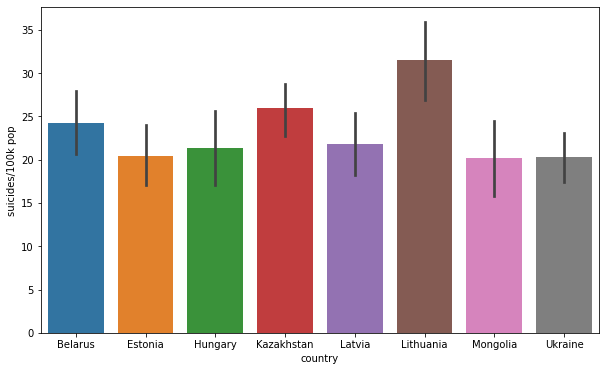

In [91]:
#confirm the countries

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=urss,
                x="country",
                y="suicides/100k pop",
                ax=ax);

In [92]:
urssdf=urss.copy()

In [93]:
#dummy age group

dummyagegroup=pd.get_dummies(urssdf['age'])
urssdf = urssdf.drop('age',axis = 1)
urssdf = urssdf.join(dummyagegroup)

In [94]:
#dummy year

dummyyearurss=pd.get_dummies(urssdf['year'])
urssdf = urssdf.drop('year',axis = 1)
urssdf = urssdf.join(dummyyearurss)

In [95]:
urssdf.columns

Index([          'country', 'suicides/100k pop',        'depression',
               '14- years',       '15-24 years',       '25-34 years',
               '35+ years',                1990,                1991,
                      1992,                1993,                1994,
                      1995,                1996,                1997,
                      1998,                1999,                2000,
                      2001,                2002,                2003,
                      2004,                2005,                2006,
                      2007,                2008,                2009,
                      2010,                2011,                2012,
                      2013,                2014,                2015,
                      2016],
      dtype='object')

In [96]:
urssdf.columns=['country','suicides/100k pop','depression','14- years','15-24 years','25-34 years','35+ years','1990', '1991','1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999','2000','2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010', '2011', '2012', '2013', '2014', '2015', '2016']

In [97]:
urssdf.columns

Index(['country', 'suicides/100k pop', 'depression', '14- years',
       '15-24 years', '25-34 years', '35+ years', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [98]:


urssdf= sm.add_constant(urssdf)
yurss = urssdf["suicides/100k pop"]
Xurss = urssdf[["const","depression",'14- years','15-24 years', '25-34 years', '35+ years','1990', '1991','1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999','2000','2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010', '2011', '2012', '2013', '2014', '2015', '2016']]
regurss = sm.OLS(yurss, Xurss).fit()

regurss.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      suicides/100k pop   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     100.7
Date:                Wed, 16 Sep 2020   Prob (F-statistic):          9.77e-216
Time:                        17:34:39   Log-Likelihood:                -2238.9
No. Observations:                 649   AIC:                             4540.
Df Residuals:                     618   BIC:                             4679.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.6403      1.595      6.671      0.000       7.508      13.773
depression      2.5111      0.541      4.640      0.000       1.448       3.574
14- years     -13.1705      1.140    -11.554      0.000     -15.409     -10.932
15-24 years    -1.9172      0.556     -3.446      0.001      -3.010      -0.825
25-34 years     7.3487      0.779      9.434      0.000       5.819       8.878
35+ years      18.3795      1.929      9.527      0.000      14.591      22.168
1990           -4.0179      2.197     -1.829      0.068      -8.333       0.297
1991           -0.2629      1.907     -0.138      0.890      -4.007       3.481
1992            0.8618      1.907      0.452      0.651      -2.883       4.607
1993            2.3309      1.907      1.222      0.222      -1.414       6.076
1994            3.4471      1.907      1.807      0.071      -0.298       7.192
1995            7.1300      1.464      4.871      0.000       4.256      10.004
1996            6.6118      1.464      4.517      0.000       3.737       9.487
1997            6.2785      1.464      4.289      0.000       3.404       9.153
1998            5.1296      1.464      3.505      0.000       2.255       8.004
1999            5.4288      1.463      3.710      0.000       2.555       8.302
2000            4.8478      1.463      3.315      0.001       1.976       7.720
2001            3.3740      1.462      2.308      0.021       0.504       6.244
2002            3.1186      1.461      2.135      0.033       0.250       5.987
2003            2.6117      1.459      1.790      0.074      -0.254       5.478
2004            1.1762      1.568      0.750      0.454      -1.904       4.256
2005           -0.6098      1.568     -0.389      0.697      -3.689       2.469
2006           -2.4041      1.567     -1.534      0.126      -5.482       0.674
2007           -1.2797      1.456     -0.879      0.380      -4.140       1.580
2008           -1.0173      1.456     -0.699      0.485      -3.876       1.842
2009           -1.2679      1.456     -0.871      0.384      -4.126       1.591
2010           -2.8715      1.456     -1.973      0.049      -5.730      -0.013
2011           -3.2824      1.455     -2.255      0.024      -6.141      -0.424
2012           -3.9928      1.567     -2.548      0.011      -7.070      -0.915
2013           -3.6558      1.567     -2.332      0.020      -6.734      -0.578
2014           -4.6427      1.456     -3.190      0.001      -7.501      -1.784
2015           -5.4586      1.567     -3.483      0.001      -8.537      -2.380
2016           -6.9429      2.539     -2.735      0.006     -11.928      -1.958
==============================================================================
Omnibus:                       95.137   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.000   Jarqu

In [99]:
#BEST SO FAR

In [100]:
#can rural area also influence USSR?

dfurssarea=dftrial.copy()

dfurssarea.head()

,country,year,suicides/100k pop,depression,Rural area
0,Albania,1992,1.595833,2.230256,62.751
1,Albania,1993,2.860833,2.236942,62.201
2,Albania,1994,2.090000,2.245163,61.646
3,Albania,1995,3.317917,2.252920,61.089
4,Albania,1996,3.736667,2.261308,60.527


In [101]:
#selecting the 8 countries of the top 10 suicide with URSS connection

dfurssarea=dfurssarea.loc[(dfurssarea['country']=='Lithuania') | (dfurssarea['country']=='Kazakhstan')| (dfurssarea['country']=='Belarus')| (dfurssarea['country']=='Latvia')| (dfurssarea['country']=='Estonia')| (dfurssarea['country']=='Ukraine')| (dfurssarea['country']=='Mongolia')| (dfurssarea['country']=='Hungary')]

dfurssarea

,country,year,suicides/100k pop,depression,Rural area
198,Belarus,1990,17.384583,3.867131,34.019
199,Belarus,1991,18.500833,3.895538,33.626
200,Belarus,1992,20.341667,3.921006,33.234
201,Belarus,1993,23.285417,3.946321,32.845
202,Belarus,1994,25.375833,3.971449,32.459
...,...,...,...,...,...
1773,Ukraine,2010,17.503750,4.005819,31.404
1774,Ukraine,2011,17.692500,3.995793,31.311
1775,Ukraine,2012,17.842917,3.987015,31.218
1776,Ukraine,2014,16.365000,3.978788,31.032


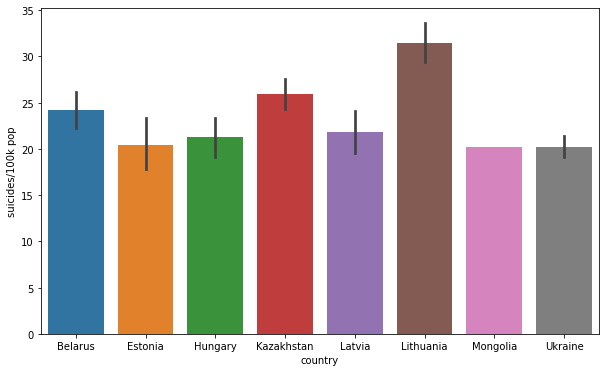

In [102]:
#confirm the countries

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=dfurssarea,
                x="country",
                y="suicides/100k pop",
                ax=ax);

In [103]:
dfurssarea

,country,year,suicides/100k pop,depression,Rural area
198,Belarus,1990,17.384583,3.867131,34.019
199,Belarus,1991,18.500833,3.895538,33.626
200,Belarus,1992,20.341667,3.921006,33.234
201,Belarus,1993,23.285417,3.946321,32.845
202,Belarus,1994,25.375833,3.971449,32.459
...,...,...,...,...,...
1773,Ukraine,2010,17.503750,4.005819,31.404
1774,Ukraine,2011,17.692500,3.995793,31.311
1775,Ukraine,2012,17.842917,3.987015,31.218
1776,Ukraine,2014,16.365000,3.978788,31.032


In [104]:
#dummy year

dummyyearurss2=pd.get_dummies(dfurssarea['year'])
dfurssarea = dfurssarea.drop('year',axis = 1)
dfurssarea = dfurssarea.join(dummyyearurss2)

dfurssarea.columns=["country","suicides/100k pop","depression",'Rural area','1990','1991','1992','1993', '1994', '1995', '1996', '1997', '1998', '1999','2000','2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010', '2011', '2012', '2013', '2014', '2015', '2016']

In [105]:
#regression rural to suicides USSR

dfurssarea= sm.add_constant(dfurssarea)
yurss2 = dfurssarea["suicides/100k pop"]
Xurss2 = dfurssarea[["const",'Rural area','1990', '1991','1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999','2000','2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010', '2011', '2012', '2013', '2014', '2015', '2016']]
regurss2 = sm.OLS(yurss2, Xurss2).fit()

regurss2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      suicides/100k pop   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     4.820
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           3.83e-10
Time:                        17:34:40   Log-Likelihood:                -470.95
No. Observations:                 163   AIC:                             997.9
Df Residuals:                     135   BIC:                             1085.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.7281      2.721      5.413      0.000       9.347      20.109
Rural area     0.2389      0.082      2.900      0.004       0.076       0.402
1990          -4.5970      2.709     -1.697      0.092      -9.954       0.760
1991          -1.0532      2.352     -0.448      0.655      -5.704       3.597
1992           0.1175      2.351      0.050      0.960      -4.532       4.767
1993           1.6332      2.350      0.695      0.488      -3.015       6.282
1994           2.7914      2.350      1.188      0.237      -1.856       7.439
1995           7.4455      1.784      4.174      0.000       3.918      10.973
1996           6.9370      1.784      3.889      0.000       3.409      10.465
1997           6.6056      1.784      3.703      0.000       3.078      10.134
1998           5.4434      1.784      3.051      0.003       1.915       8.971
1999           5.7173      1.784      3.205      0.002       2.189       9.246
2000           5.1077      1.784      2.863      0.005       1.580       8.636
2001           3.6013      1.784      2.019      0.045       0.074       7.129
2002           3.3135      1.783      1.858      0.065      -0.213       6.840
2003           2.7698      1.783      1.554      0.123      -0.756       6.296
2004           0.9760      1.923      0.508      0.613      -2.827       4.779
2005          -0.8467      1.922     -0.440      0.660      -4.648       2.955
2006          -2.6785      1.922     -1.394      0.166      -6.479       1.122
2007          -1.2283      1.781     -0.690      0.492      -4.751       2.294
2008          -1.0076      1.781     -0.566      0.573      -4.530       2.515
2009          -1.2895      1.781     -0.724      0.470      -4.812       2.233
2010          -2.9055      1.781     -1.631      0.105      -6.428       0.617
2011          -3.3122      1.781     -1.860      0.065      -6.835       0.210
2012          -4.4518      1.919     -2.320      0.022      -8.247      -0.657
2013          -3.8403      1.918     -2.002      0.047      -7.633      -0.047
2014          -4.6113      1.782     -2.588      0.011      -8.136      -1.087
2015          -5.8751      1.918     -3.063      0.003      -9.668      -2.082
2016          -0.0344      2.689     -0.013      0.990      -5.352       5.283
==============================================================================
Omnibus:                       17.943   Durbin-Watson:                   0.317
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.501
Skew:                           0.882   Prob(JB):                     2.14e-05
Kurtosis:                       2.761   Cond. No.                     8.03e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [106]:
#regression rural to depression USSR

dfurssarea2=dfurssarea.copy()

dfurssarea2= sm.add_constant(dfurssarea2)
yurss3 = dfurssarea2["depression"]
Xurss3 = dfurssarea2[["const",'suicides/100k pop','Rural area','1990', '1991','1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999','2000','2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010', '2011', '2012', '2013', '2014', '2015', '2016']]
regurss3 = sm.OLS(yurss3, Xurss3).fit()

regurss3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             depression   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1.304
Date:                Wed, 16 Sep 2020   Prob (F-statistic):              0.161
Time:                        17:34:40   Log-Likelihood:                -94.531
No. Observations:                 163   AIC:                             247.1
Df Residuals:                     134   BIC:                             336.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.9091      0.299     13.063      0.000       3.317       4.501
suicides/100k pop     0.0339      0.009      3.955      0.000       0.017       0.051
Rural area           -0.0315      0.008     -3.722      0.000      -0.048      -0.015
1990                  0.4707      0.273      1.724      0.087      -0.069       1.011
1991                  0.1758      0.235      0.749      0.455      -0.288       0.640
1992                  0.1481      0.234      0.632      0.529      -0.315       0.612
1993                  0.1090      0.235      0.464      0.643      -0.355       0.573
1994                  0.0803      0.236      0.341      0.734      -0.386       0.546
1995                  0.0569      0.189      0.301      0.764      -0.317       0.431
1996                  0.0787      0.188      0.419      0.676      -0.292       0.450
1997                  0.0904      0.187      0.484      0.629      -0.279       0.460
1998                  0.1261      0.184      0.686      0.494      -0.238       0.490
1999                  0.1086      0.185      0.588      0.557      -0.256       0.473
2000                  0.1164      0.183      0.635      0.526      -0.246       0.479
2001                  0.1481      0.180      0.821      0.413      -0.209       0.505
2002                  0.1323      0.180      0.735      0.464      -0.224       0.488
2003                  0.1220      0.179      0.680      0.498      -0.233       0.477
2004                  0.1305      0.192      0.680      0.498      -0.249       0.510
2005                  0.1640      0.192      0.855      0.394      -0.215       0.543
2006                  0.1976      0.193      1.024      0.308      -0.184       0.579
2007                  0.1401      0.178      0.788      0.432      -0.212       0.492
2008                  0.0974      0.178      0.548      0.585      -0.254       0.449
2009                  0.0765      0.178      0.430      0.668      -0.275       0.428
2010                  0.1107      0.179      0.617      0.538      -0.244       0.465
2011                  0.1090      0.180      0.606      0.545      -0.247       0.465
2012                  0.1153      0.195      0.591      0.556      -0.271       0.501
2013                  0.0446      0.194      0.230      0.819      -0.339       0.428
2014                  0.1161      0.182      0.638      0.525      -0.244       0.476
2015                  0.1369      0.198      0.692      0.490      -0.254       0.528
2016                  0.5072      0.268      1.892      0.061      -0.023       1.037
==============================================================================
Omnibus:                       16.025   Durbin-Watson:                   0.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.746
Skew:   

In [107]:
#import csv
alcohol=pd.read_csv("../data/alcohol-2000-2009.csv")

In [108]:
alcohol.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,"Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).1","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).2","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).3","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).4","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).5","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).6","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).7","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).8","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).9"
0,Country,Data Source,Beverage Types,2009.00,2008.00,2007.00,2006.00,2005.00,2004.0,2003.0,2002.0,2001.0,2000.0
1,Afghanistan,Data source,All types,0.01,0.03,0.02,0.03,0.02,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Data source,Beer,0.01,0.01,0.01,0.01,0.01,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Data source,Wine,0.00,0.00,0.01,0.01,0.00,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Data source,Spirits,0.00,0.02,0.00,0.01,0.01,NaN,NaN,NaN,NaN,NaN


In [109]:
alcohol.columns = alcohol.iloc[0]

In [110]:
alcohol=alcohol.drop([0])


In [111]:
alcohol=alcohol.drop('Data Source', axis=1)
alcohol

,Country,Beverage Types,2009.0,2008.0,2007.0,2006.0,2005.0,2004.0,2003.0,2002.0,2001.0,2000.0
1,Afghanistan,All types,0.01,0.03,0.02,0.03,0.02,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Beer,0.01,0.01,0.01,0.01,0.01,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Wine,0.00,0.00,0.01,0.01,0.00,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Spirits,0.00,0.02,0.00,0.01,0.01,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,Other alcoholic beverages,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
931,Zimbabwe,All types,2.77,2.82,2.26,2.35,2.17,2.48,1.96,2.39,1.93,1.89
932,Zimbabwe,Beer,1.09,1.47,0.88,1.09,0.96,1.14,0.88,1.16,0.74,0.67
933,Zimbabwe,Wine,0.07,0.04,0.01,0.01,0.01,0.01,0.02,0.04,0.01,0.01
934,Zimbabwe,Spirits,0.34,0.36,0.36,0.37,0.37,0.44,0.40,0.41,0.41,0.42


In [112]:

nulls=alcohol.isnull().sum()
nulls.sort_values(ascending=False)

0
2000.0            20
2001.0            20
2002.0            20
2003.0            20
2004.0            20
2005.0            10
2006.0             0
2007.0             0
2008.0             0
2009.0             0
Beverage Types     0
Country            0
dtype: int64

In [113]:
alcohol

,Country,Beverage Types,2009.0,2008.0,2007.0,2006.0,2005.0,2004.0,2003.0,2002.0,2001.0,2000.0
1,Afghanistan,All types,0.01,0.03,0.02,0.03,0.02,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Beer,0.01,0.01,0.01,0.01,0.01,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Wine,0.00,0.00,0.01,0.01,0.00,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Spirits,0.00,0.02,0.00,0.01,0.01,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,Other alcoholic beverages,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
931,Zimbabwe,All types,2.77,2.82,2.26,2.35,2.17,2.48,1.96,2.39,1.93,1.89
932,Zimbabwe,Beer,1.09,1.47,0.88,1.09,0.96,1.14,0.88,1.16,0.74,0.67
933,Zimbabwe,Wine,0.07,0.04,0.01,0.01,0.01,0.01,0.02,0.04,0.01,0.01
934,Zimbabwe,Spirits,0.34,0.36,0.36,0.37,0.37,0.44,0.40,0.41,0.41,0.42


In [114]:
alcohol=alcohol.fillna(0)

alcohol.columns=['Country','Beverage Types','2009','2008','2007','2006','2005','2004','2003','2002','2001','2000']

alcohol

,Country,Beverage Types,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
1,Afghanistan,All types,0.01,0.03,0.02,0.03,0.02,0.00,0.00,0.00,0.00,0.00
2,Afghanistan,Beer,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00
3,Afghanistan,Wine,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00
4,Afghanistan,Spirits,0.00,0.02,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00
5,Afghanistan,Other alcoholic beverages,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
931,Zimbabwe,All types,2.77,2.82,2.26,2.35,2.17,2.48,1.96,2.39,1.93,1.89
932,Zimbabwe,Beer,1.09,1.47,0.88,1.09,0.96,1.14,0.88,1.16,0.74,0.67
933,Zimbabwe,Wine,0.07,0.04,0.01,0.01,0.01,0.01,0.02,0.04,0.01,0.01
934,Zimbabwe,Spirits,0.34,0.36,0.36,0.37,0.37,0.44,0.40,0.41,0.41,0.42


In [115]:
#groupby all types alcohol

alcohol=alcohol.groupby(['Country'], as_index=False).agg({'2009':'mean','2008':'mean','2007':'mean','2006':'mean','2005':'mean','2004':'mean','2003':'mean','2002':'mean','2001':'mean','2000':'mean'})



In [116]:
alcohol

,Country,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Afghanistan,0.004,0.012,0.008,0.012,0.008,0.000,0.000,0.000,0.000,0.000
1,Albania,2.318,2.224,2.184,2.068,1.992,1.770,1.734,1.584,1.804,1.568
2,Algeria,0.172,0.146,0.136,0.152,0.200,0.180,0.132,0.144,0.092,0.100
3,Andorra,4.314,4.352,4.582,4.736,4.698,4.862,4.864,4.822,5.190,5.064
4,Angola,2.448,2.080,1.872,1.606,1.396,0.962,0.880,0.830,0.776,0.588
...,...,...,...,...,...,...,...,...,...,...,...
182,Venezuela (Bolivarian Republic of),3.100,3.364,3.558,3.350,3.192,3.034,2.556,2.796,3.260,3.236
183,Viet Nam,0.788,0.712,0.604,0.542,0.476,0.452,0.372,0.326,0.304,0.284
184,Yemen,0.012,0.016,0.020,0.016,0.014,0.024,0.016,0.028,0.032,0.028
185,Zambia,1.222,1.064,1.268,1.090,0.964,1.100,0.956,1.042,1.118,1.128


In [117]:
#selecting the 8 countries of the top 10 suicide with URSS connection

alcohol=alcohol.loc[(alcohol['Country']=='Lithuania') | (alcohol['Country']=='Kazakhstan')| (alcohol['Country']=='Belarus')| (alcohol['Country']=='Latvia')| (alcohol['Country']=='Estonia')| (alcohol['Country']=='Ukraine')| (alcohol['Country']=='Mongolia')| (alcohol['Country']=='Hungary')]

In [118]:
alcohol=alcohol.melt(['Country'],var_name="Year",value_name="Alcohol comsumption")
alcohol

,Country,Year,Alcohol comsumption
0,Belarus,2009,5.592
1,Estonia,2009,5.862
2,Hungary,2009,4.608
3,Kazakhstan,2009,1.264
4,Latvia,2009,3.940
...,...,...,...
75,Kazakhstan,2000,2.324
76,Latvia,2000,2.852
77,Lithuania,2000,3.948
78,Mongolia,2000,0.860


In [119]:
# alcohol other year frame 1980-1999

In [120]:
alcohol2=pd.read_csv("../data/alcohol-1980-1999.csv")

In [121]:
alcohol2.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,"Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).1","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).2","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).3","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).4","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).5","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).6",...,"Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).10","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).11","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).12","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).13","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).14","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).15","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).16","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).17","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).18","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol).19"
0,Country,Data Source,Beverage Types,1999.0,1998.0,1997.0,1996.0,1995.0,1994.0,1993.0,...,1989.0,1988.0,1987.0,1986.0,1985.0,1984.0,1983.0,1982.0,1981.0,1980.0
1,Afghanistan,Data source,All types,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,Data source,Beer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Data source,Wine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Data source,Spirits,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
alcohol2.columns = alcohol2.iloc[0]




In [123]:
alcohol2=alcohol2.drop([0])

In [124]:
alcohol2=alcohol2.drop('Data Source', axis=1)

In [125]:
null2=alcohol2.isnull().sum()
null2.sort_values(ascending=False)
alcohol2=alcohol2.fillna(0)

alcohol2.columns

Index([       'Country', 'Beverage Types',           1999.0,           1998.0,
                 1997.0,           1996.0,           1995.0,           1994.0,
                 1993.0,           1992.0,           1991.0,           1990.0,
                 1989.0,           1988.0,           1987.0,           1986.0,
                 1985.0,           1984.0,           1983.0,           1982.0,
                 1981.0,           1980.0],
      dtype='object', name=0)

In [126]:
alcohol2.head()

,Country,Beverage Types,1999.0,1998.0,1997.0,1996.0,1995.0,1994.0,1993.0,1992.0,...,1989.0,1988.0,1987.0,1986.0,1985.0,1984.0,1983.0,1982.0,1981.0,1980.0
1,Afghanistan,All types,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,Beer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Wine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Spirits,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Afghanistan,Other alcoholic beverages,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
alcohol2.columns=['Country','Beverage Types','1999','1998','1997','1996','1995','1994','1993','1992','1991','1990','1989','1988','1987','1986','1985','1984','1983','1982','1981','1980']

In [128]:
alcohol2.columns

dropcolumnsalc=['1989', '1988', '1987', '1986','1985', '1984', '1983', '1982', '1981', '1980']

alcohol2=alcohol2.drop(dropcolumnsalc, axis=1)

alcohol2

,Country,Beverage Types,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
1,Afghanistan,All types,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Afghanistan,Beer,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Afghanistan,Wine,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Afghanistan,Spirits,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,Afghanistan,Other alcoholic beverages,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
910,Zimbabwe,All types,4.63,4.82,5.19,4.22,4.34,4.68,3.54,2.83,3.39,4.50
911,Zimbabwe,Beer,0.60,0.37,0.56,0.65,0.53,0.95,0.47,0.19,0.47,0.18
912,Zimbabwe,Wine,0.04,0.04,0.05,0.05,0.05,0.04,0.03,0.03,0.03,0.02
913,Zimbabwe,Spirits,3.27,3.54,3.61,2.53,2.88,2.62,1.95,1.63,1.79,2.88


In [129]:
alcohol2=alcohol2.groupby(['Country'], as_index=False).agg({'1999':'mean','1998':'mean','1997':'mean','1996':'mean','1995':'mean','1994':'mean','1993':'mean','1992':'mean','1991':'mean','1990':'mean'})


In [130]:
#selecting the 8 countries of the top 10 suicide with URSS connection

alcohol2=alcohol2.loc[(alcohol2['Country']=='Lithuania') | (alcohol2['Country']=='Kazakhstan')| (alcohol2['Country']=='Belarus')| (alcohol2['Country']=='Latvia')| (alcohol2['Country']=='Estonia')| (alcohol2['Country']=='Ukraine')| (alcohol2['Country']=='Mongolia')| (alcohol2['Country']=='Hungary')]

In [131]:
alcohol2=alcohol2.melt(['Country'],var_name="Year",value_name="Alcohol comsumption")

In [132]:
alcohol2.dtypes

Country                 object
Year                    object
Alcohol comsumption    float64
dtype: object

In [133]:
newcorrurss=urss.copy()

newcorrurss

,country,year,age,suicides/100k pop,depression
874,Belarus,1990,14- years,0.700000,1.223662
875,Belarus,1990,15-24 years,11.090000,3.342973
876,Belarus,1990,25-34 years,23.925000,4.216288
877,Belarus,1990,35+ years,33.823333,6.685600
878,Belarus,1991,14- years,0.995000,1.228455
...,...,...,...,...,...
7463,Ukraine,2014,35+ years,29.895000,6.944632
7464,Ukraine,2015,14- years,1.245000,1.169220
7465,Ukraine,2015,15-24 years,13.090000,3.398070
7466,Ukraine,2015,25-34 years,18.245000,4.429617


In [134]:
newcorrurss=newcorrurss.groupby(['country','year'], as_index=False).agg({'suicides/100k pop':'mean','depression':'mean'})

In [135]:
newcorrurss

,country,year,suicides/100k pop,depression
0,Belarus,1990,17.384583,3.867131
1,Belarus,1991,18.500833,3.895538
2,Belarus,1992,20.341667,3.921006
3,Belarus,1993,23.285417,3.946321
4,Belarus,1994,25.375833,3.971449
...,...,...,...,...
158,Ukraine,2010,17.503750,4.005819
159,Ukraine,2011,17.692500,3.995793
160,Ukraine,2012,17.842917,3.987015
161,Ukraine,2014,16.365000,3.978788


In [137]:
alcohol.dtypes

Country                 object
Year                    object
Alcohol comsumption    float64
dtype: object

In [138]:
newcorrurss.dtypes

country               object
year                   int64
suicides/100k pop    float64
depression           float64
dtype: object

In [139]:
#transform for merging
alcohol['Year']=pd.to_numeric(alcohol['Year'],downcast='integer')
alcohol2['Year']=pd.to_numeric(alcohol2['Year'],downcast='integer')

In [140]:
# first corr

firstcor=newcorrurss.copy()

alcoholtrial = firstcor.merge(alcohol,left_on=['country','year'], right_on = ['Country','Year'])

#alcoholtrial = alcohol2.merge(alcohol2,how='left',left_on=['country','year'], right_on = ['Country','Year'])


In [141]:
#dummy year

alcoholtrial2=alcoholtrial.copy()

dummyyearalc=pd.get_dummies(alcoholtrial2['year'])
alcoholtrial2 = alcoholtrial2.drop(['year','Country','Year'],axis = 1)
alcoholtrial2 = alcoholtrial2.join(dummyyearalc)

alcoholtrial2.columns=['country','suicides/100k pop','depression','Alcohol comsumption','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009']

alcoholtrial2

,country,suicides/100k pop,depression,Alcohol comsumption,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Belarus,29.375833,4.078325,5.170,1,0,0,0,0,0,0,0,0,0
1,Belarus,27.780417,4.077562,4.296,0,1,0,0,0,0,0,0,0,0
2,Belarus,27.835833,4.077728,4.712,0,0,1,0,0,0,0,0,0,0
3,Belarus,29.287500,4.074014,4.468,0,0,0,1,0,0,0,0,0,0
4,Belarus,23.470417,4.030087,5.564,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Ukraine,18.860000,4.236863,2.730,0,0,0,0,0,1,0,0,0,0
63,Ukraine,18.018750,4.201773,2.968,0,0,0,0,0,0,1,0,0,0
64,Ukraine,18.660000,4.146052,3.250,0,0,0,0,0,0,0,1,0,0
65,Ukraine,17.865833,4.084186,3.764,0,0,0,0,0,0,0,0,1,0


In [143]:
#try regression with alcohol


alcoholtrial2= sm.add_constant(alcoholtrial2)
yalcohol2 = alcoholtrial2["suicides/100k pop"]
Xalcohol2 = alcoholtrial2[["const",'depression','Alcohol comsumption','2000','2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']]
regalcohol2 = sm.OLS(yalcohol2, Xalcohol2).fit()

regalcohol2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      suicides/100k pop   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     2.233
Date:                Wed, 16 Sep 2020   Prob (F-statistic):             0.0252
Time:                        17:35:41   Log-Likelihood:                -198.39
No. Observations:                  67   AIC:                             420.8
Df Residuals:                      55   BIC:                             447.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.9816      4.843      3.094      0.003       5.276      24.687
depression              2.7885      1.275      2.187      0.033       0.233       5.344
Alcohol comsumption    -0.8057      0.476     -1.694      0.096      -1.759       0.147
2000                    5.0271      1.948      2.580      0.013       1.123       8.932
2001                    3.5502      1.942      1.829      0.073      -0.341       7.441
2002                    3.5224      1.934      1.822      0.074      -0.353       7.398
2003                    3.0246      1.925      1.571      0.122      -0.833       6.882
2004                    1.8036      2.042      0.883      0.381      -2.288       5.896
2005                    0.1759      2.045      0.086      0.932      -3.923       4.275
2006                   -1.4079      2.059     -0.684      0.497      -5.534       2.718
2007                   -0.2248      1.941     -0.116      0.908      -4.115       3.666
2008                    0.0214      1.930      0.011      0.991      -3.847       3.890
2009                   -0.5110      1.895     -0.270      0.788      -4.309       3.287
==============================================================================
Omnibus:                        5.923   Durbin-Watson:                   0.389
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                3.907
Skew:                           0.429   Prob(JB):                        0.142
Kurtosis:                       2.185   Cond. No.                     1.33e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.29e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [144]:
alcohol2.columns

Index(['Country', 'Year', 'Alcohol comsumption'], dtype='object')

In [146]:
# second corr

secondcor=newcorrurss.copy()

alcoholtrialsec = secondcor.merge(alcohol2,left_on=['country','year'], right_on = ['Country','Year'])

alcoholtrialsec

,country,year,suicides/100k pop,depression,Country,Year,Alcohol comsumption
0,Belarus,1990,17.384583,3.867131,Belarus,1990,3.1400
1,Belarus,1991,18.500833,3.895538,Belarus,1991,3.5460
2,Belarus,1992,20.341667,3.921006,Belarus,1992,3.4820
3,Belarus,1993,23.285417,3.946321,Belarus,1993,4.0920
4,Belarus,1994,25.375833,3.971449,Belarus,1994,3.9440
5,Belarus,1995,25.622917,3.995170,Belarus,1995,3.7380
6,Belarus,1996,28.784583,4.014064,Belarus,1996,4.1800
7,Belarus,1997,28.595000,4.038558,Belarus,1997,4.4080
8,Belarus,1998,29.418333,4.058232,Belarus,1998,4.6900
9,Belarus,1999,30.124167,4.073070,Belarus,1999,5.0900


In [148]:
alcoholtrialsec2=alcoholtrialsec.copy()

dummytrialsec=pd.get_dummies(alcoholtrialsec['year'])
alcoholtrialsec2 = alcoholtrialsec2.drop(['year','Country','Year'],axis = 1)
alcoholtrialsec2 = alcoholtrialsec2.join(dummytrialsec)

alcoholtrialsec2.columns=['country','suicides/100k pop','depression','Alcohol comsumption','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999']

alcoholtrialsec2

,country,suicides/100k pop,depression,Alcohol comsumption,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,Belarus,17.384583,3.867131,3.1400,1,0,0,0,0,0,0,0,0,0
1,Belarus,18.500833,3.895538,3.5460,0,1,0,0,0,0,0,0,0,0
2,Belarus,20.341667,3.921006,3.4820,0,0,1,0,0,0,0,0,0,0
3,Belarus,23.285417,3.946321,4.0920,0,0,0,1,0,0,0,0,0,0
4,Belarus,25.375833,3.971449,3.9440,0,0,0,0,1,0,0,0,0,0
5,Belarus,25.622917,3.995170,3.7380,0,0,0,0,0,1,0,0,0,0
6,Belarus,28.784583,4.014064,4.1800,0,0,0,0,0,0,1,0,0,0
7,Belarus,28.595000,4.038558,4.4080,0,0,0,0,0,0,0,1,0,0
8,Belarus,29.418333,4.058232,4.6900,0,0,0,0,0,0,0,0,1,0
9,Belarus,30.124167,4.073070,5.0900,0,0,0,0,0,0,0,0,0,1


In [152]:
#try regression with alcohol right after USSR


alcoholtrialsec2= sm.add_constant(alcoholtrialsec2)
ytrialsec = alcoholtrialsec2["suicides/100k pop"]
Xtrialsec = alcoholtrialsec2[["const",'Alcohol comsumption','1990','1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999']]
regtrialsec = sm.OLS(ytrialsec, Xtrialsec).fit()

regtrialsec.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      suicides/100k pop   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     3.065
Date:                Wed, 16 Sep 2020   Prob (F-statistic):            0.00507
Time:                        17:44:53   Log-Likelihood:                -150.53
No. Observations:                  54   AIC:                             323.1
Df Residuals:                      43   BIC:                             344.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  21.8977      1.366     16.036      0.000      19.144      24.652
Alcohol comsumption     0.5729      0.365      1.570      0.124      -0.163       1.309
1990                   -4.8700      2.370     -2.055      0.046      -9.650      -0.090
1991                   -2.2463      2.125     -1.057      0.296      -6.531       2.039
1992                   -0.9139      2.103     -0.435      0.666      -5.155       3.328
1993                    0.5831      2.104      0.277      0.783      -3.660       4.826
1994                    1.9497      2.084      0.935      0.355      -2.254       6.153
1995                    6.5168      1.612      4.043      0.000       3.266       9.767
1996                    6.0479      1.613      3.750      0.001       2.795       9.300
1997                    5.6473      1.611      3.505      0.001       2.398       8.897
1998                    4.4725      1.611      2.776      0.008       1.223       7.722
1999                    4.7105      1.611      2.924      0.005       1.461       7.960
==============================================================================
Omnibus:                        4.750   Durbin-Watson:                   0.623
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                4.342
Skew:                           0.694   Prob(JB):                        0.114
Kurtosis:                       2.970   Cond. No.                     8.14e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.39e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

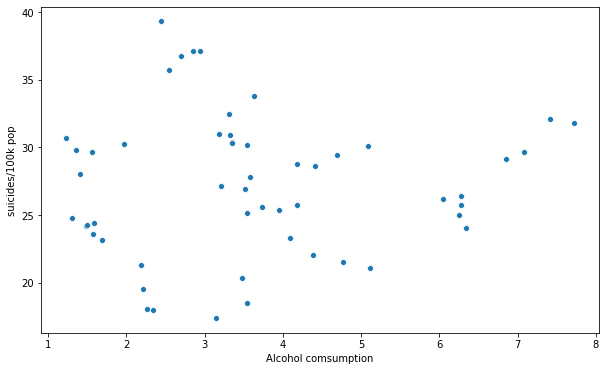

In [155]:

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=alcoholtrialsec2,
                x="Alcohol comsumption",
                y="suicides/100k pop",
                ax=ax);